##  Full Specification Data Analysis

This is a comprehensive, structured examination of the dataset, where all variables (features) are documented, explored, and understood before modeling begins.

### 1. Import Libraries & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
df = pd.read_parquet('../data/raw/extracted_s3.parquet')

df.head()
df.shape

(11902, 83)

In [5]:
df.shape

(11902, 83)

### 2. Data Description
The dataset is comprised of Mar. 5 - Apr. 15, 2025 hourly time series data with 11902 rows × 67 columns (w/ floating values). The dataset contains the following features:

![](../img/data_description.png)

### 3. Data cleaning

In [6]:
# Filter columns that start with "mempool_fee_histogram_bin_"
hist_cols = [col for col in df.columns if col.startswith("mempool_fee_histogram_bin_")]

# Identify columns where all values are 0.0
zero_hist_cols = [col for col in hist_cols if (df[col] == 0.0).all()]

print("Histogram columns with only 0 float values:")
print(zero_hist_cols)
cols_to_drop = [
    'mempool_fee_histogram_bin_300_350', 'mempool_fee_histogram_bin_350_400',
    'mempool_fee_histogram_bin_400_450', 'mempool_fee_histogram_bin_450_500',
    'mempool_fee_histogram_bin_500_550', 'mempool_fee_histogram_bin_550_600',
    'mempool_fee_histogram_bin_600_650', 'mempool_fee_histogram_bin_650_700',
    'mempool_fee_histogram_bin_700_750', 'mempool_fee_histogram_bin_750_800',
    'mempool_fee_histogram_bin_800_850', 'mempool_fee_histogram_bin_850_900',
    'mempool_fee_histogram_bin_900_950', 'mempool_fee_histogram_bin_950_1000',
    'mempool_fee_histogram_bin_1000_plus'
]

df.drop(columns=cols_to_drop, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.sort_values('timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('timestamp', inplace=True)
df = df.iloc[1:]
# df.to_parquet("../data/processed/cleaned.parquet")

Histogram columns with only 0 float values:
['mempool_fee_histogram_bin_300_350', 'mempool_fee_histogram_bin_350_400', 'mempool_fee_histogram_bin_400_450', 'mempool_fee_histogram_bin_450_500', 'mempool_fee_histogram_bin_500_550', 'mempool_fee_histogram_bin_550_600', 'mempool_fee_histogram_bin_600_650', 'mempool_fee_histogram_bin_650_700', 'mempool_fee_histogram_bin_700_750', 'mempool_fee_histogram_bin_750_800', 'mempool_fee_histogram_bin_800_850', 'mempool_fee_histogram_bin_850_900', 'mempool_fee_histogram_bin_900_950', 'mempool_fee_histogram_bin_950_1000', 'mempool_fee_histogram_bin_1000_plus']


In [18]:
df.shape

(11902, 67)

### 4. General Overview

In [17]:
print(f"Dataset shape: {df.shape}")
df.info()
df.describe(include='all').T

Dataset shape: (11902, 67)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11902 entries, 2025-03-05 02:12:13 to 2025-04-15 09:54:42
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   mempool_blocks_blockSize                  11901 non-null  float64
 1   mempool_blocks_blockVSize                 11901 non-null  float64
 2   mempool_blocks_nTx                        11901 non-null  float64
 3   mempool_blocks_totalFees                  11901 non-null  float64
 4   mempool_blocks_medianFee                  11901 non-null  float64
 5   recommended_fee_fastestFee                11902 non-null  float64
 6   recommended_fee_halfHourFee               11902 non-null  float64
 7   recommended_fee_hourFee                   11902 non-null  float64
 8   recommended_fee_economyFee                11902 non-null  float64
 9   recommended_fee_minimumFee                1

,count,mean,std,min,25%,50%,75%,max
mempool_blocks_blockSize,11901.0,1.559835e+06,3.834879e+05,7501.00,1.486038e+06,1.621340e+06,1.740367e+06,3.889621e+06
mempool_blocks_blockVSize,11901.0,9.347928e+05,1.930068e+05,4367.25,9.979092e+05,9.979522e+05,9.979820e+05,9.979998e+05
mempool_blocks_nTx,11901.0,2.661583e+03,1.170741e+03,15.00,1.786000e+03,2.835000e+03,3.538000e+03,6.275000e+03
mempool_blocks_totalFees,11901.0,3.914089e+06,3.618740e+06,15658.00,1.993227e+06,3.024442e+06,4.703293e+06,8.107809e+07
mempool_blocks_medianFee,11901.0,2.630856e+00,5.128006e+00,0.00,1.191299e+00,2.007238e+00,3.014316e+00,2.731774e+02
...,...,...,...,...,...,...,...,...
mempool_fee_histogram_bin_95_100,11902.0,8.476138e+00,6.538653e+02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.083900e+04
mempool_fee_histogram_bin_100_150,11902.0,1.845145e+03,1.545838e+04,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.117370e+05
mempool_fee_histogram_bin_150_200,11902.0,1.171847e+02,2.679288e+03,0.00,0.000000e+00,0.000000e+00,0.000000e+00,6.776300e+04
mempool_fee_histogram_bin_200_250,11902.0,1.177067e+02,2.755528e+03,0.00,0.000000e+00,0.000000e+00,0.000000e+00,9.550100e+04


All of the columns are non-null and float64 type. For larger bins, it has a relatively large portion of 0 value. We do see anomalies in bitcoin prices features where the minimum is -1. Let's explore this issue further and then go into the detail of distribution of each feature.

In [34]:
anomaly_prices = df[df['price_USD'] == -1]
anomaly_count = anomaly_prices.shape[0]
anomaly_timestamps = anomaly_prices.index 

print(f"Number of -1 values in 'price_USD': {anomaly_count}")
print(f"Timestamps (or indices) with -1 values: {anomaly_timestamps}")

Number of -1 values in 'price_USD': 4
Timestamps (or indices) with -1 values: DatetimeIndex(['2025-04-07 21:29:41', '2025-04-07 21:34:41',
               '2025-04-07 21:39:42', '2025-04-11 16:44:41'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


We see that out of 11902 rows, there is only 4 entries of USD BTC price being -1. This is likely due to the fact that the data is not available for those hours. As the impact is minimal, we can either drop these rows or apply simple imputation.

### 5. Feature description distribution

| Feature                                  | Description                                            |
|:-----------------------------------------|:-------------------------------------------------------|
| mempool_blocks_blockSize                 | Total raw block size of pending transactions (bytes)   |
| mempool_blocks_blockVSize                | Virtual size of pending block (vBytes)                 |
| mempool_blocks_nTx                       | Number of transactions in the estimated next block     |
| mempool_blocks_totalFees                 | Total fees expected in next block (satoshis)           |
| mempool_blocks_medianFee                 | Median fee rate in the next block (sats/vB)            |
| recommended_fee_fastestFee               | Recommended fee for fastest confirmation (sats/vB)     |
| recommended_fee_halfHourFee              | Recommended fee for confirmation within 30 mins        |
| recommended_fee_hourFee                  | Recommended fee for confirmation within 1 hour         |
| recommended_fee_economyFee               | Recommended low-priority fee (slower confirmation)     |
| recommended_fee_minimumFee               | Minimum fee needed to enter the mempool                |
| mempool_count                            | Number of unconfirmed transactions in the mempool      |
| mempool_vsize                            | Total virtual size of mempool (vBytes)                 |
| mempool_total_fee                        | Total fee volume of mempool (sats)                     |
| difficulty_adjustment_progressPercent    | Progress toward next difficulty adjustment (%)         |
| difficulty_adjustment_difficultyChange   | Expected difficulty change (%)                         |
| difficulty_adjustment_remainingBlocks    | Blocks left until next difficulty adjustment           |
| difficulty_adjustment_remainingTime      | Estimated time until difficulty adjustment (sec)       |
| difficulty_adjustment_previousTime       | Time taken for the previous difficulty epoch (sec)     |
| difficulty_adjustment_nextRetargetHeight | Height at which next difficulty retarget occurs        |
| difficulty_adjustment_timeAvg            | Average time between blocks in the current epoch (sec) |
| difficulty_adjustment_adjustedTimeAvg    | Adjusted average block time considering skew           |
| difficulty_adjustment_timeOffset         | Time offset vs. expected block production              |
| difficulty_adjustment_expectedBlocks     | Expected blocks per difficulty period                  |
| price_USD                                | Bitcoin market price in USD                            |
| price_EUR                                | Bitcoin market price in EUR                            |
| price_GBP                                | Bitcoin market price in GBP                            |
| price_CAD                                | Bitcoin market price in CAD                            |
| price_CHF                                | Bitcoin market price in CHF                            |
| price_AUD                                | Bitcoin market price in AUD                            |
| price_JPY                                | Bitcoin market price in JPY                            |
| mempool_fee_histogram_bin_               | Each mempool_fee_histogram_bin_* feature represents the number of transactions in the mempool whose fee rate falls within a specific sats/vB range (e.g., bin_1_2 means 1–2 sats/vB).|

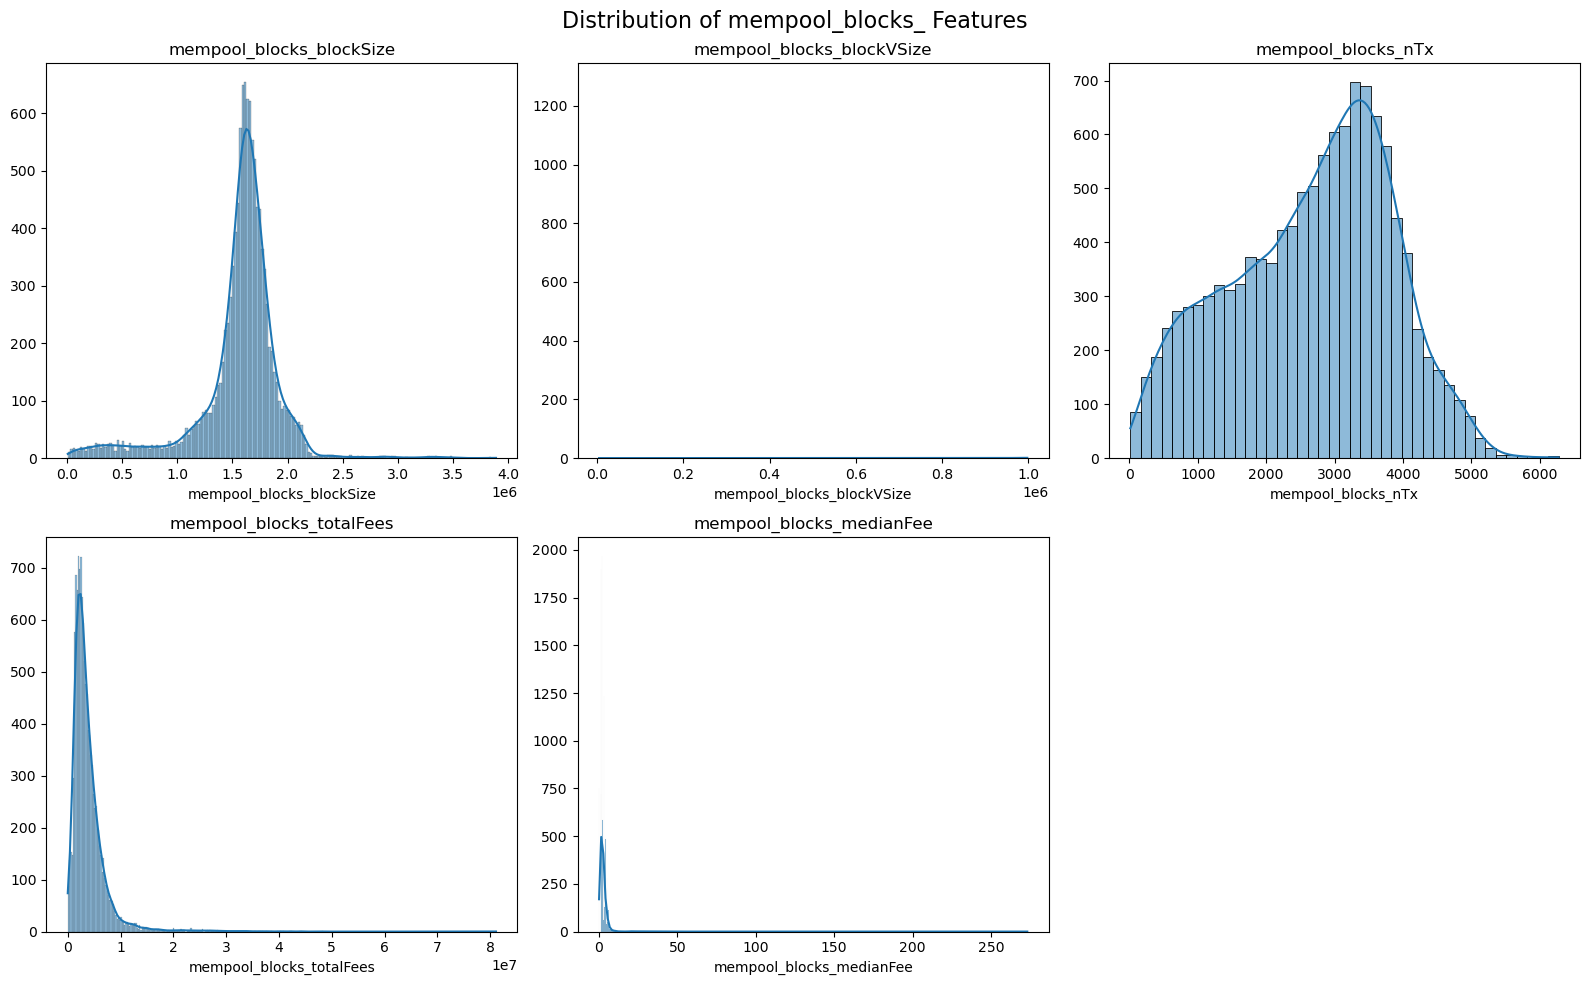

In [8]:
def plot_feature_group(df, prefix, max_cols=3, figsize=(16, 10)):
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    n = len(group_cols)
    rows = (n + max_cols - 1) // max_cols
    fig, axes = plt.subplots(rows, max_cols, figsize=figsize, squeeze=False)
    
    for i, col in enumerate(group_cols):
        ax = axes[i // max_cols][i % max_cols]
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(col)
        ax.set_ylabel("")
    for j in range(i+1, rows * max_cols):
        fig.delaxes(axes[j // max_cols][j % max_cols])

    fig.suptitle(f"Distribution of {prefix} Features", fontsize=16)
    fig.tight_layout()
    plt.show()

plot_feature_group(df, "mempool_blocks_")


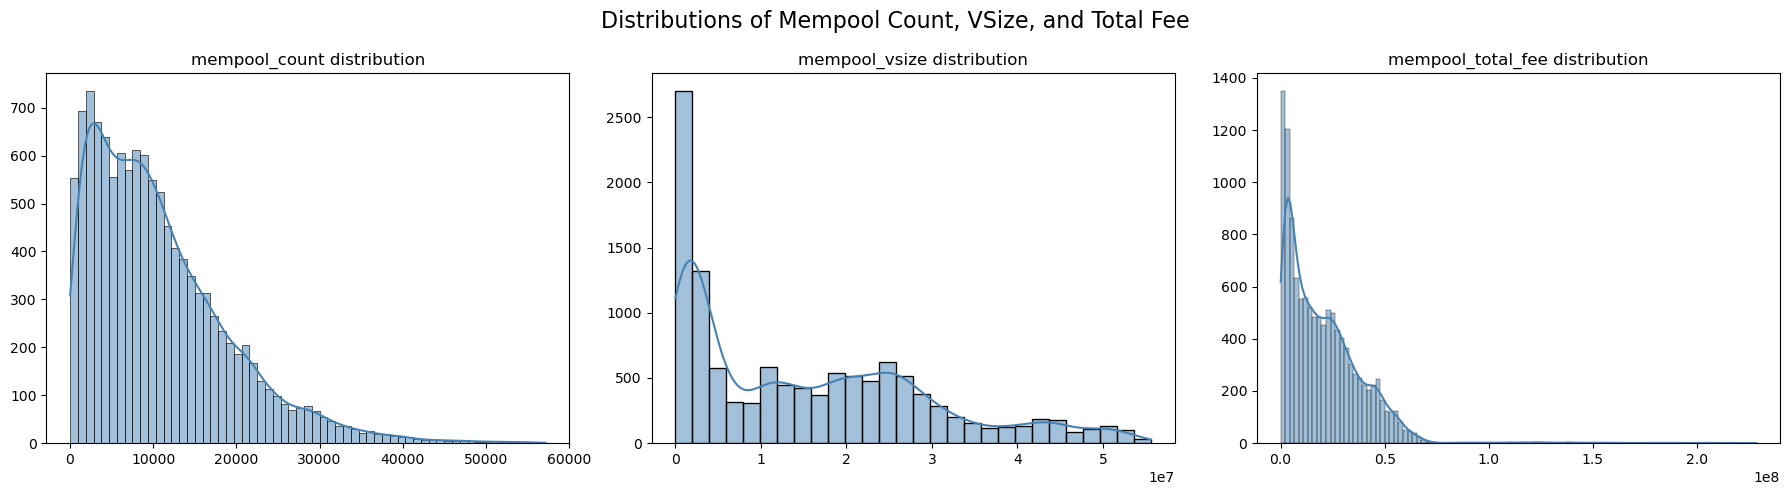

In [9]:
features = ["mempool_count", "mempool_vsize", "mempool_total_fee"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, feature in enumerate(features):
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{feature} distribution")
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

fig.suptitle("Distributions of Mempool Count, VSize, and Total Fee", fontsize=16)
plt.tight_layout()
plt.show()

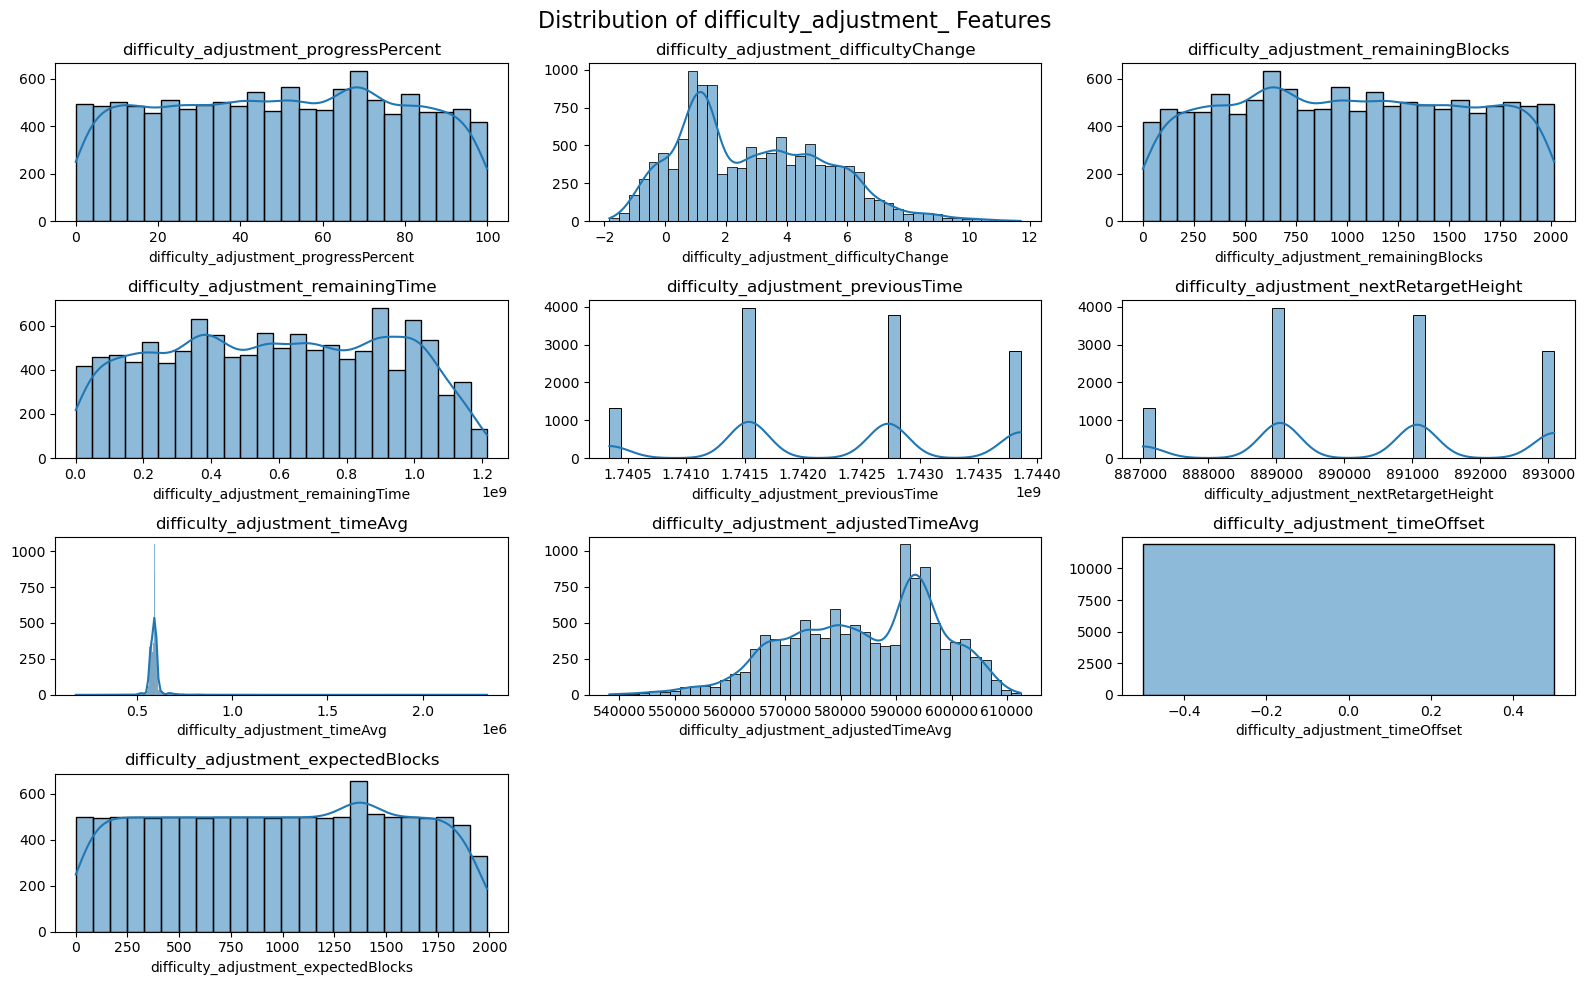

In [10]:
plot_feature_group(df, "difficulty_adjustment_")


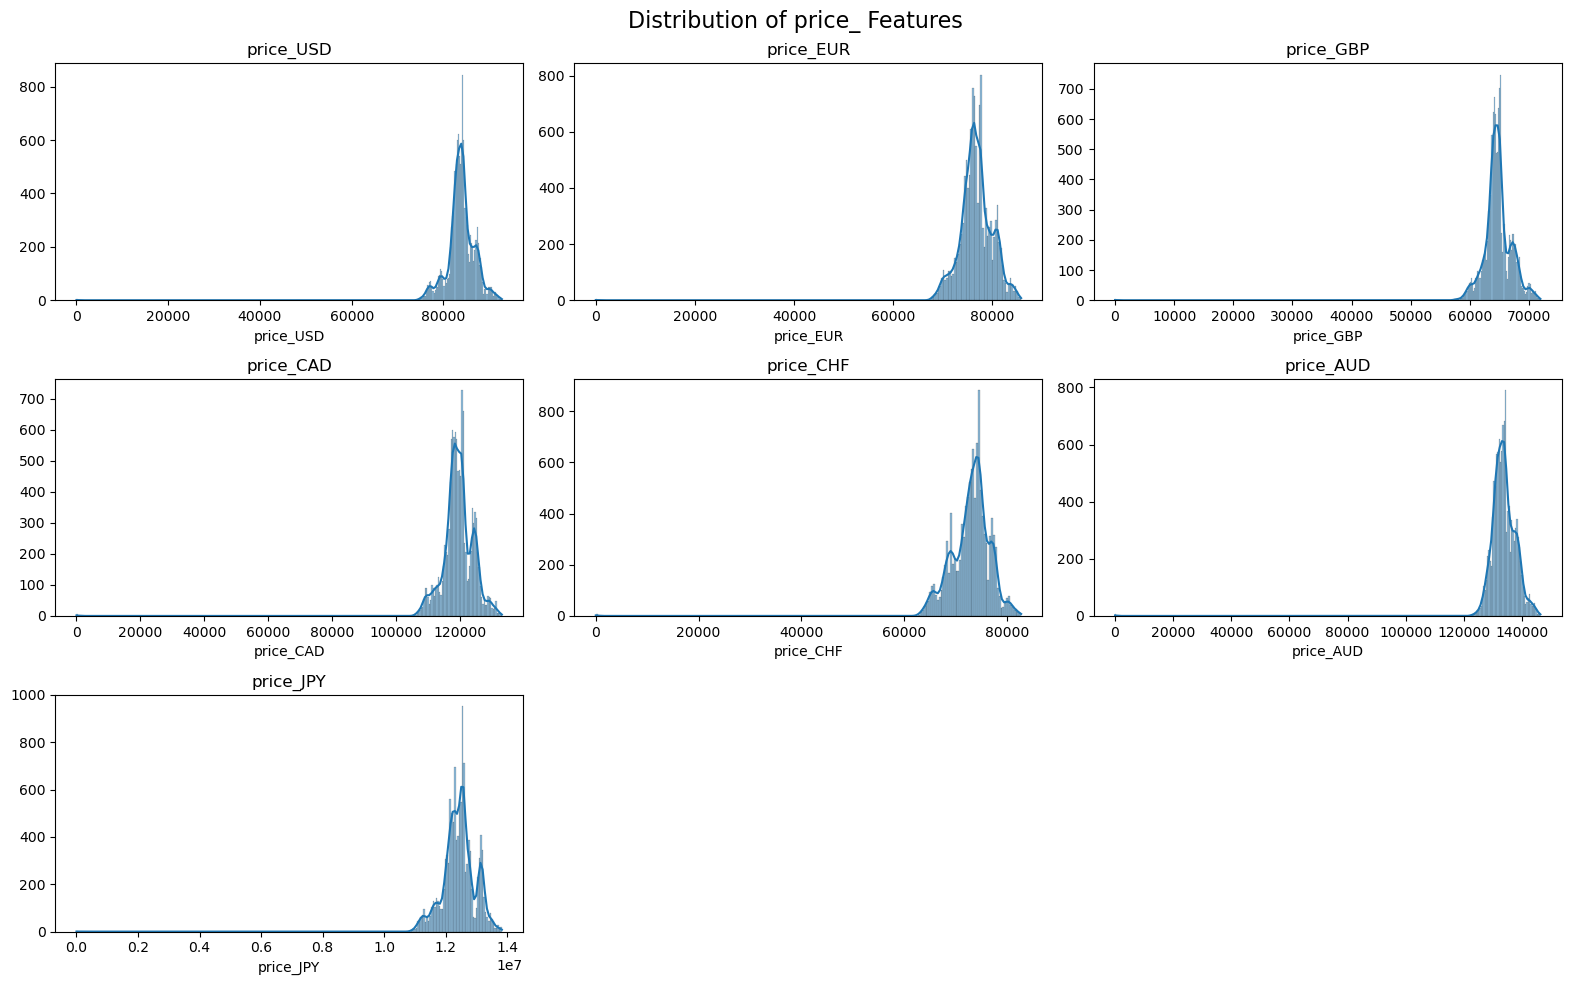

In [11]:
plot_feature_group(df, "price_")


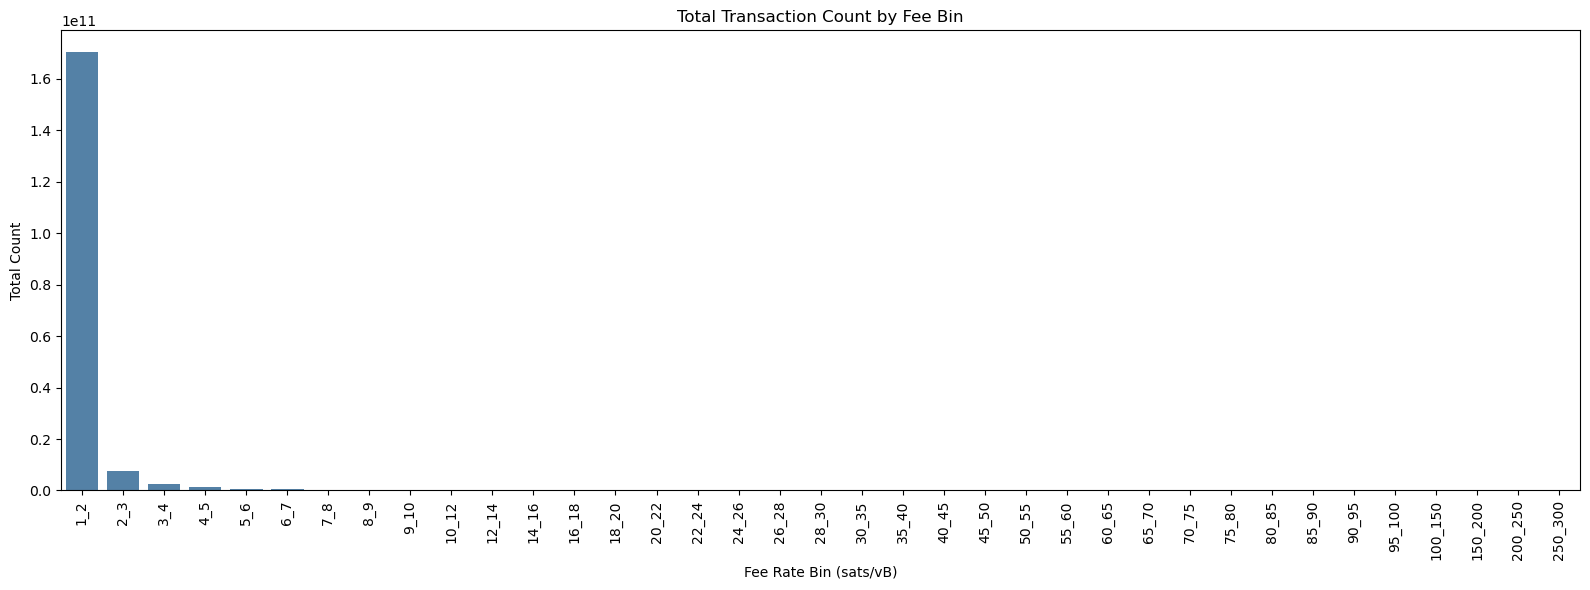

In [12]:
fee_cols = [col for col in df.columns if col.startswith("mempool_fee_histogram_bin_")]
total_per_bin = df[fee_cols].sum()
def extract_start(bin_name):
    return float(bin_name.split("_")[-2])
total_per_bin = total_per_bin.sort_values(key=lambda x: [extract_start(c) for c in x.index])
bin_labels = [col.replace("mempool_fee_histogram_bin_", "") for col in total_per_bin.index]
plt.figure(figsize=(16, 6))
sns.barplot(x=bin_labels, y=total_per_bin.values, color="steelblue")
plt.xticks(rotation=90)
plt.title("Total Transaction Count by Fee Bin")
plt.xlabel("Fee Rate Bin (sats/vB)")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()


In [26]:
# Calculate the proportion of each bin's count relative to the total count
total_count = total_per_bin.sum()
bin_proportions = total_per_bin / total_count * 100
bin_proportions.head()

mempool_fee_histogram_bin_1_2    92.535262
mempool_fee_histogram_bin_2_3     4.154127
mempool_fee_histogram_bin_3_4     1.416085
mempool_fee_histogram_bin_4_5     0.678469
mempool_fee_histogram_bin_5_6     0.391578
dtype: float64

Based on the distribution of mempool_fee_histogram_bin above, ~98% of the transaction fees is in the range of 0-5 sats/vB.

### 6. Timestamp Coverage & Sampling

In [36]:
print("Start:", df["timestamp"].min())
print("End:", df["timestamp"].max())
print("Frequency mode:", df["timestamp"].diff().mode())

Start: 1741140733
End: 1744710882
Frequency mode: 0    199500.0
Name: timestamp, dtype: float64


In [32]:
from datetime import datetime, timezone

datetime.fromtimestamp(1741140733, tz=timezone.utc)

datetime.datetime(2025, 3, 5, 2, 12, 13, tzinfo=datetime.timezone.utc)

In [31]:
datetime.fromtimestamp(1744710882, tz=timezone.utc)

datetime.datetime(2025, 4, 15, 9, 54, 42, tzinfo=datetime.timezone.utc)

The data is not regularly spaced (e.g., not hourly or daily)
We may need to resample or interpolate the data if modeling assumes fixed intervals (e.g., ARIMA, TFT, DeepAR)

### 7. Correlation Heatmap

In [31]:
group_prefixes = {
    # "mempool_blocks": "mempool_blocks_",
    "recommended_fee": "recommended_fee_",
    "mempool": "mempool_",
    "difficulty_adjustment": "difficulty_adjustment_",
    "price": "price_"
}
excluded_prefixes = ["mempool_fee_histogram_"]
def plot_group_correlation(df, group_name, prefix, exclude_prefixes=None):
    # Select columns matching prefix
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    
    # Exclude anything that starts with excluded prefixes
    if exclude_prefixes:
        group_cols = [col for col in group_cols if not any(col.startswith(ex) for ex in exclude_prefixes)]

    # Drop NA for correlation
    group_df = df[group_cols].dropna()

    # Skip if not enough features
    if len(group_cols) < 2:
        print(f"Skipping group '{group_name}' — fewer than 2 valid columns.")
        return

    # Compute correlation
    corr = group_df.corr()

    # Shorten columns that start with 'difficulty_adjustment_' to 'diff_adj_'
    corr.columns = [col.replace("difficulty_adjustment_", "diff_adj_") for col in corr.columns]
    corr.index = [col.replace("difficulty_adjustment_", "diff_adj_") for col in corr.index]

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
    plt.title(f"{group_name} Feature Correlation")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


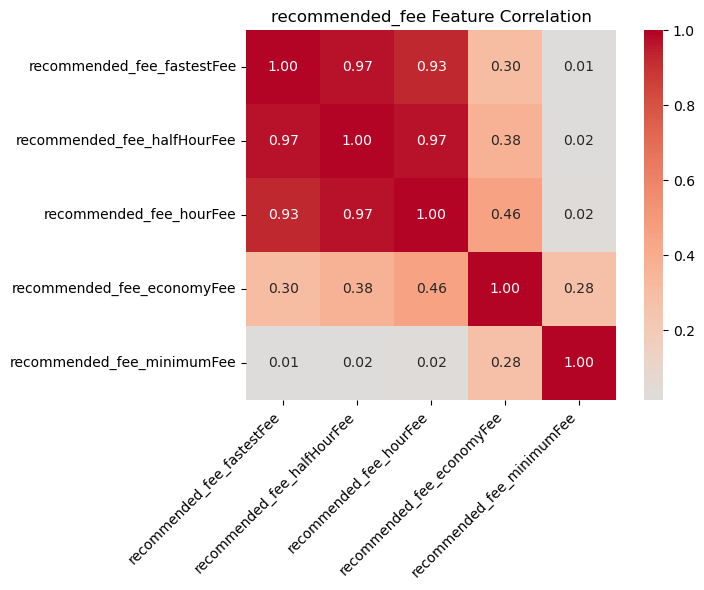

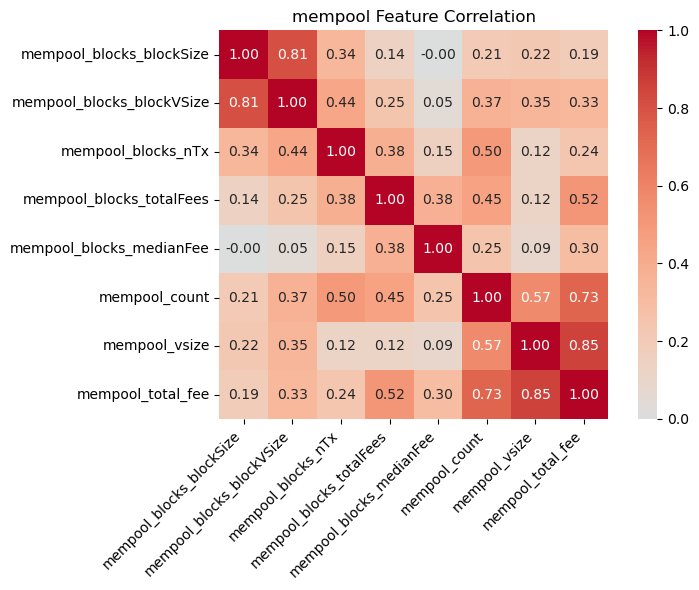

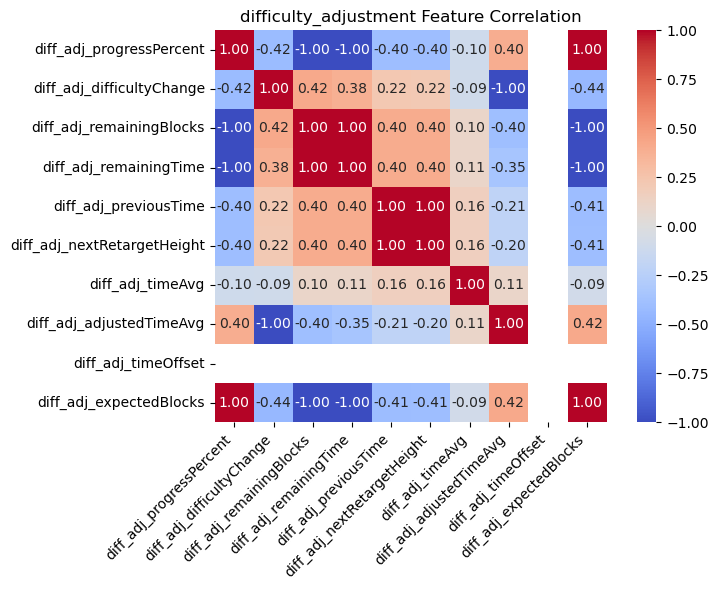

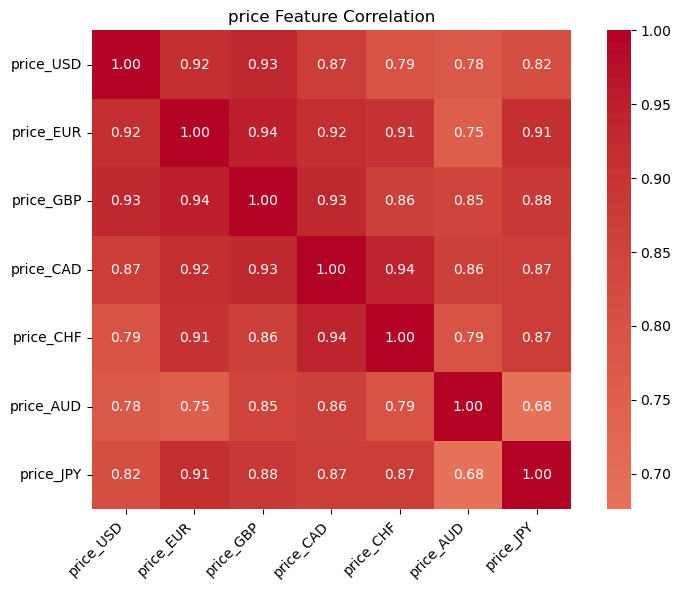

In [32]:
for group_name, prefix in group_prefixes.items():
    plot_group_correlation(df, group_name, prefix, exclude_prefixes = excluded_prefixes)


We can see the correlation among all the features here

### 8. Key features

Since our goal is to forecast fee rates, the key features should be those that are:

1. Directly Related to Fee Behavior
Influence how fees are set or how congestion builds up
Reflect network load or transaction priority dynamics
2. Useful for Forecasting Time Series
Time-varying
Available in real-time or known into the future

| Category                | Features                                                                                      | Why Important?                                                                                      |
|-------------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| Target & Fee Estimates  | `recommended_fee_fastestFee`, `recommended_fee_halfHourFee`, `recommended_fee_hourFee`, `recommended_fee_economyFee`, `recommended_fee_minimumFee` | These are the predicted targets (or close variants), and how the mempool system estimates current rates |
| Mempool Congestion      | `mempool_count`, `mempool_vsize`, `mempool_total_fee`                                        | Reflect the real-time network load and pending demand                                              |
| Block Characteristics   | `mempool_blocks_blockSize`, `mempool_blocks_blockVSize`, `mempool_blocks_nTx`, `mempool_blocks_totalFees`, `mempool_blocks_medianFee` | Describe current mining block shape and behavior                                                  |
| Difficulty Signals      | `difficulty_adjustment_remainingBlocks`, `difficulty_adjustment_difficultyChange`, `difficulty_adjustment_adjustedTimeAvg` | Affect block production pace and expected fee demand                                              |
| Market Prices           | `price_USD`, `price_CAD`, `price_EUR`, etc.                                                   | May capture global market sentiment and volume, though likely weak correlates unless fees are fiat-tied |



In [60]:
key_features = [
    # fee estimates
    "recommended_fee_fastestFee",
    "recommended_fee_halfHourFee",
    "recommended_fee_hourFee",
    "recommended_fee_economyFee",
    "recommended_fee_minimumFee",
    
    # mempool state
    "mempool_count",
    "mempool_vsize",
    "mempool_total_fee",
    
    # block metrics
    "mempool_blocks_blockSize",
    "mempool_blocks_blockVSize",
    "mempool_blocks_nTx",
    "mempool_blocks_totalFees",
    "mempool_blocks_medianFee",
    
    # difficulty signals (select most relevant)
    "difficulty_adjustment_remainingBlocks",
    "difficulty_adjustment_difficultyChange",
    "difficulty_adjustment_adjustedTimeAvg",
    
    # market signal 
    "price_USD"
]


In [61]:
def plot_distributions(columns, cols_per_row=3):
    rows = int(np.ceil(len(columns) / cols_per_row))
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color="cornflowerblue")
        axes[i].set_title(col, fontsize=11)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Key Feature Distributions (excluding histogram bins)", fontsize=16)
    fig.tight_layout()
    plt.show()

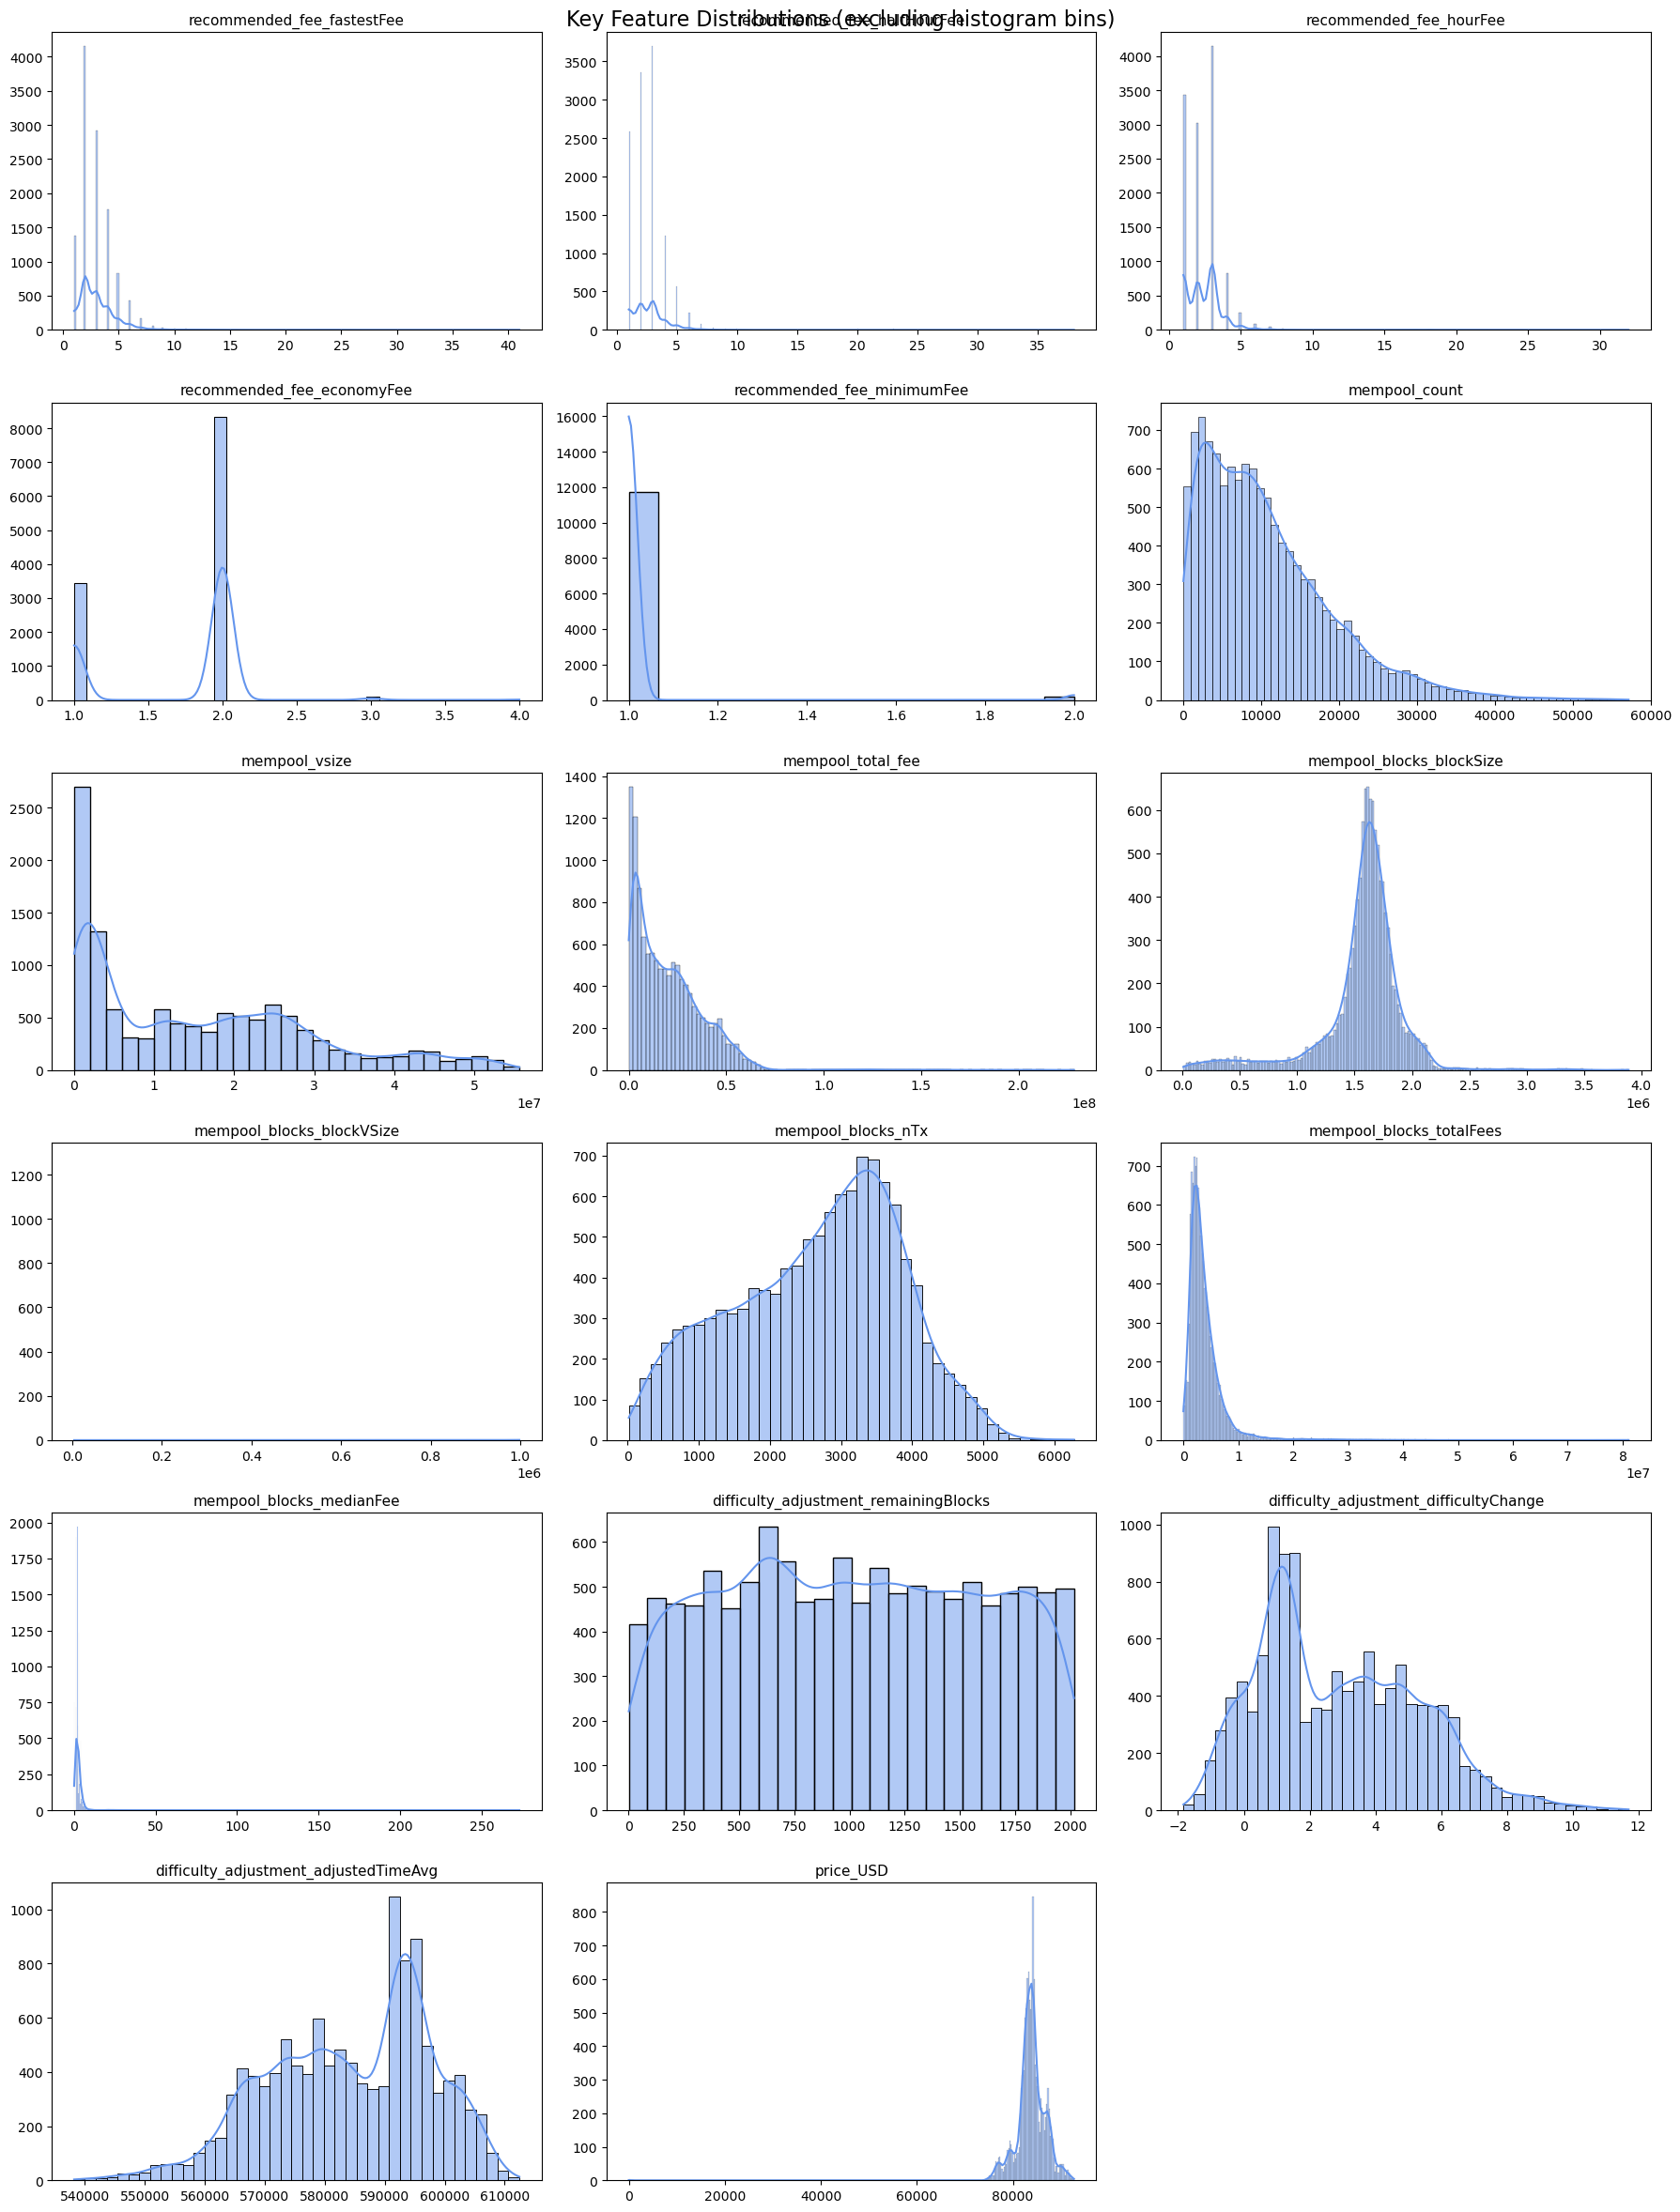

In [62]:
plot_distributions(key_features)
